# Customer Segmentation 

# 1. Question

In this Portfolio, the "marketing_campaign" dataset from a grocery firm is investigated, and it contains several factors to learn the pattern of customer behaviour including their education, marial status, or income, etc, and this helps define the customer segmentation.  The dataset could be found at https://www.kaggle.com/datasets/jackdaoud/marketing-data

The descriptions of the columns are as below:

|Column|Meaning| 
|:-----:|:-----:|
|ID|Customer's unique identifier in the database|
|Year_Birth|Customer's year of birth|
|Education|Customer's education level|
|Marial_Status|Customer's Marial status|
|Income|Customer's yearly income in USD|
|Kidhome|Number of childrens in his/her household|
|Teenhome|Number of teenagers in his/her household|
|Dt_Customer|Date of registering membership of the grocery store|
|Recency|the number of days since the last purchase date|
|MntWines|The money amount spent on wine in the last 2 years|
|MntFruits|The money amount spent on fruit in the last 2 years|
|MntMeatProducts|The money amount spent on meat in the last 2 years|
|MntFishProducts|The money amount spent on fish in the last 2 years|
|MntSweetProducts|The money amount spent on sweets in the last 2 years| 
|MntGoldProds|The money amount spent on golds in the last 2 years|
|NumDealsPurchases|The number of purchases with discount|
|AcceptedCmp1|in the 1st campaign, customer accepted the offer (1), or didn't accept (0)|
|AcceptedCmp2|in the 2nd campaign, customer accepted the offer (1), or didn't accept (0)|
|AcceptedCmp3|in the 3rd campaign, customer accepted the offer (1), or didn't accept (0)| 
|AcceptedCmp4|in the 4th campaign, customer accepted the offer (1), or didn't accept (0)|
|AcceptedCmp5|in the 5th campaign, customer accepted the offer (1), or didn't accept (0)|
|Response|in the last campaign, customer accepted the offer (1), or didn't accept (0)|
|NumWebPurchases|Number of purchases via website |
|NumCatalogPurchases|Number of purchases with a catalogue|
|NumStorePurchases|Number of in-store purchases|
|NumWebVisitsMonth|Number of website visits in a month|

How can the customers of this grocery store be segmented into different groups with their demographic information and purchasing behavior?



The main task is to perform unsupervised learning to help the business know their customer behaviours.

1. Explore the data: have a glance at the data, summarize the data statistics

2. Prepare the data: handle categorical data, missing values, outliers, convert categorical data, and standardize numerical features if needed

3. Segment the customers with clustering method like Kmeans and Hierarchical clustering. In this part, you may need:

    3.1 Apply a method to reduce dimensions 
    
    3.2 Use Elbow method to select the optimal K
    
    3.3 Cluster with Kmeans to figure out the customer's group
    
    3.4 Draw insights from the clusters



# Load and clean data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder
import datetime 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_44742/4106262908.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load the dataset
df = pd.read_csv("./marketing_campaign.csv", sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# The shape of the dataframe
df.shape

(2240, 29)

In [287]:
# Inspect the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In this dataset,
- There are 29 columns and 2240 rows
- Income have null data, and we need to check if other features also have null data
- From the data of Year of Birth, we can know the age of the customers. Let's call this new column "Age"
- From the spending values, we can know the money amount spent on all products. Let's call this new column "TotalSpent"
- There are two columns indicating  the number of children in a family, and Marital_status that let us know the number of people in the family size. Let's call this "Family_Size", and we can also know if the adults are parrent or not, let's mark this column as "Is_Parent" with 1 is yes and 0 is no
- Education and Marital_Status are categorical data, so we need to convert them into numeric data before processing further
- The columns: "Z_CostContact" and "Z_Revenue" provide little required information so we may exclude these from our dataset


In [288]:
#Check null data in all columns
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Only Income has null data, Income has 24 rows of null values. Despite a small number, to carefully preserve the data amount, the null values are replaced with mean value of that column.

In [4]:
# Replace null data with mean value of Income column
mean_income = df['Income'].mean()
df.fillna({'Income': mean_income}, inplace=True)

In [5]:
# Extract useful information from the data
#Create Age column
df['Age'] = 2024- df['Year_Birth']

#Create total spend, and Fnb spend
df['TotalSpent'] =df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'] + df["MntWines"]


In [6]:
# Convert to list to apply the max function
Ages = []
for i in df["Age"]:
    Ages.append(i)

# To know if there is any false, or out-of-date values, we should take a look at the oldest and youngest in customers list

oldest = max(Ages)
print (f"The oldest customer: {oldest}")
youngest = min (Ages)
print (f"The youngest customer:{youngest}")

The oldest customer: 131
The youngest customer:28


Some data points might be obsolete. We'll take a look at this later to know if the oldest customer is just outliers or it makes up a majority of the dataset with boxplot

Convert the categorical data of Education and Maritial status

In [7]:
#select categorical data
obj_type_value = df.select_dtypes(include="object").copy()
obj_type_value.head()


,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014


In [8]:
#To know how many values each feature contain
#To know values inside Education:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [9]:
#To know values inside Marital_status:
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

- Before performing OrdinalEncoder, Education levels and Marital Status also need malnipulating to group them with better meaning since:
    - In Education level, we actually have 3 main types which are undergraduate, graduate, and post graduate. "PhD", "Master", and "2nCycle" should be "Postgraduate", graduation should be "Graduate", and Basic should be "Undergraduate"
    - In Marital_status: 
        - Absurb and YOLO has confusing meaning, and very small data, so it is safe to remove these two 
        - the marital status actually can be grouped with:
            - "Married" is "Married", and "Together"
            - "Unmarried" is "Single", "Divorced", "Widow", "Alone"

In [10]:
#Drop data of "Absurb" and "YOLO"
df = df.drop(df[df["Marital_Status"] == "YOLO"].index)
df = df.drop(df[df["Marital_Status"] == "Absurd"].index)

In [11]:
#Education: Replace the defined values with new categories name
df["Education"] = df["Education"].replace({"Basic": "Undergraduate","graduation":"Graduate", "PhD": "Postgraduate", "Master": "Postgraduate", "2n Cycle": "Postgraduate"})

#Marital_Status: Replace the dinfed values with new categories name
df["Marital_Status"] = df["Marital_Status"].replace({"Together": "Married", "Single": "Unmarried", "Divorced":"Unmarried","Widow": "Unmarried", "Alone":"Unmarried" })

In [12]:
#Create Family size:
df["Adult"] = df["Marital_Status"].replace({"Unmarried": 1, "Married": 2})
df["Adult"] = df["Adult"].astype(int)
df["FamilySize"] = df["Adult"]+df["Teenhome"]+df["Kidhome"]
#Create Is_Parent:
df["Is_Parent"] = np.where((df["Teenhome"] > 0) | (df["Kidhome"] > 0), 1, 0)

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_42609/854965233.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Adult"] = df["Marital_Status"].replace({"Unmarried": 1, "Married": 2})


In [13]:
#Convert categorical data using OrdinalEncoder
ord_enc = OrdinalEncoder()
df["Education"] = ord_enc.fit_transform(df[["Education"]])
df["Marital_Status"] = ord_enc.fit_transform(df[["Marital_Status"]])

In [14]:
# Values of education after converting categorical data
df["Education"].value_counts()

Education
0.0    1126
1.0    1056
2.0      54
Name: count, dtype: int64

The Education values have been transformed:

|Education level|Converted values|
|---|---|
|Postgraduate| 0|
|Graduate|1|
|Undergraduate|2|

In [300]:
#Recheck after converting
df["Marital_Status"].value_counts()

Marital_Status
0.0    1444
1.0     792
Name: count, dtype: int64

|Marital_Status|Converted values|
|---|---|
|Married |    0|
|Unmarried|1|



To check for the outliers, the boxplot is applied for 

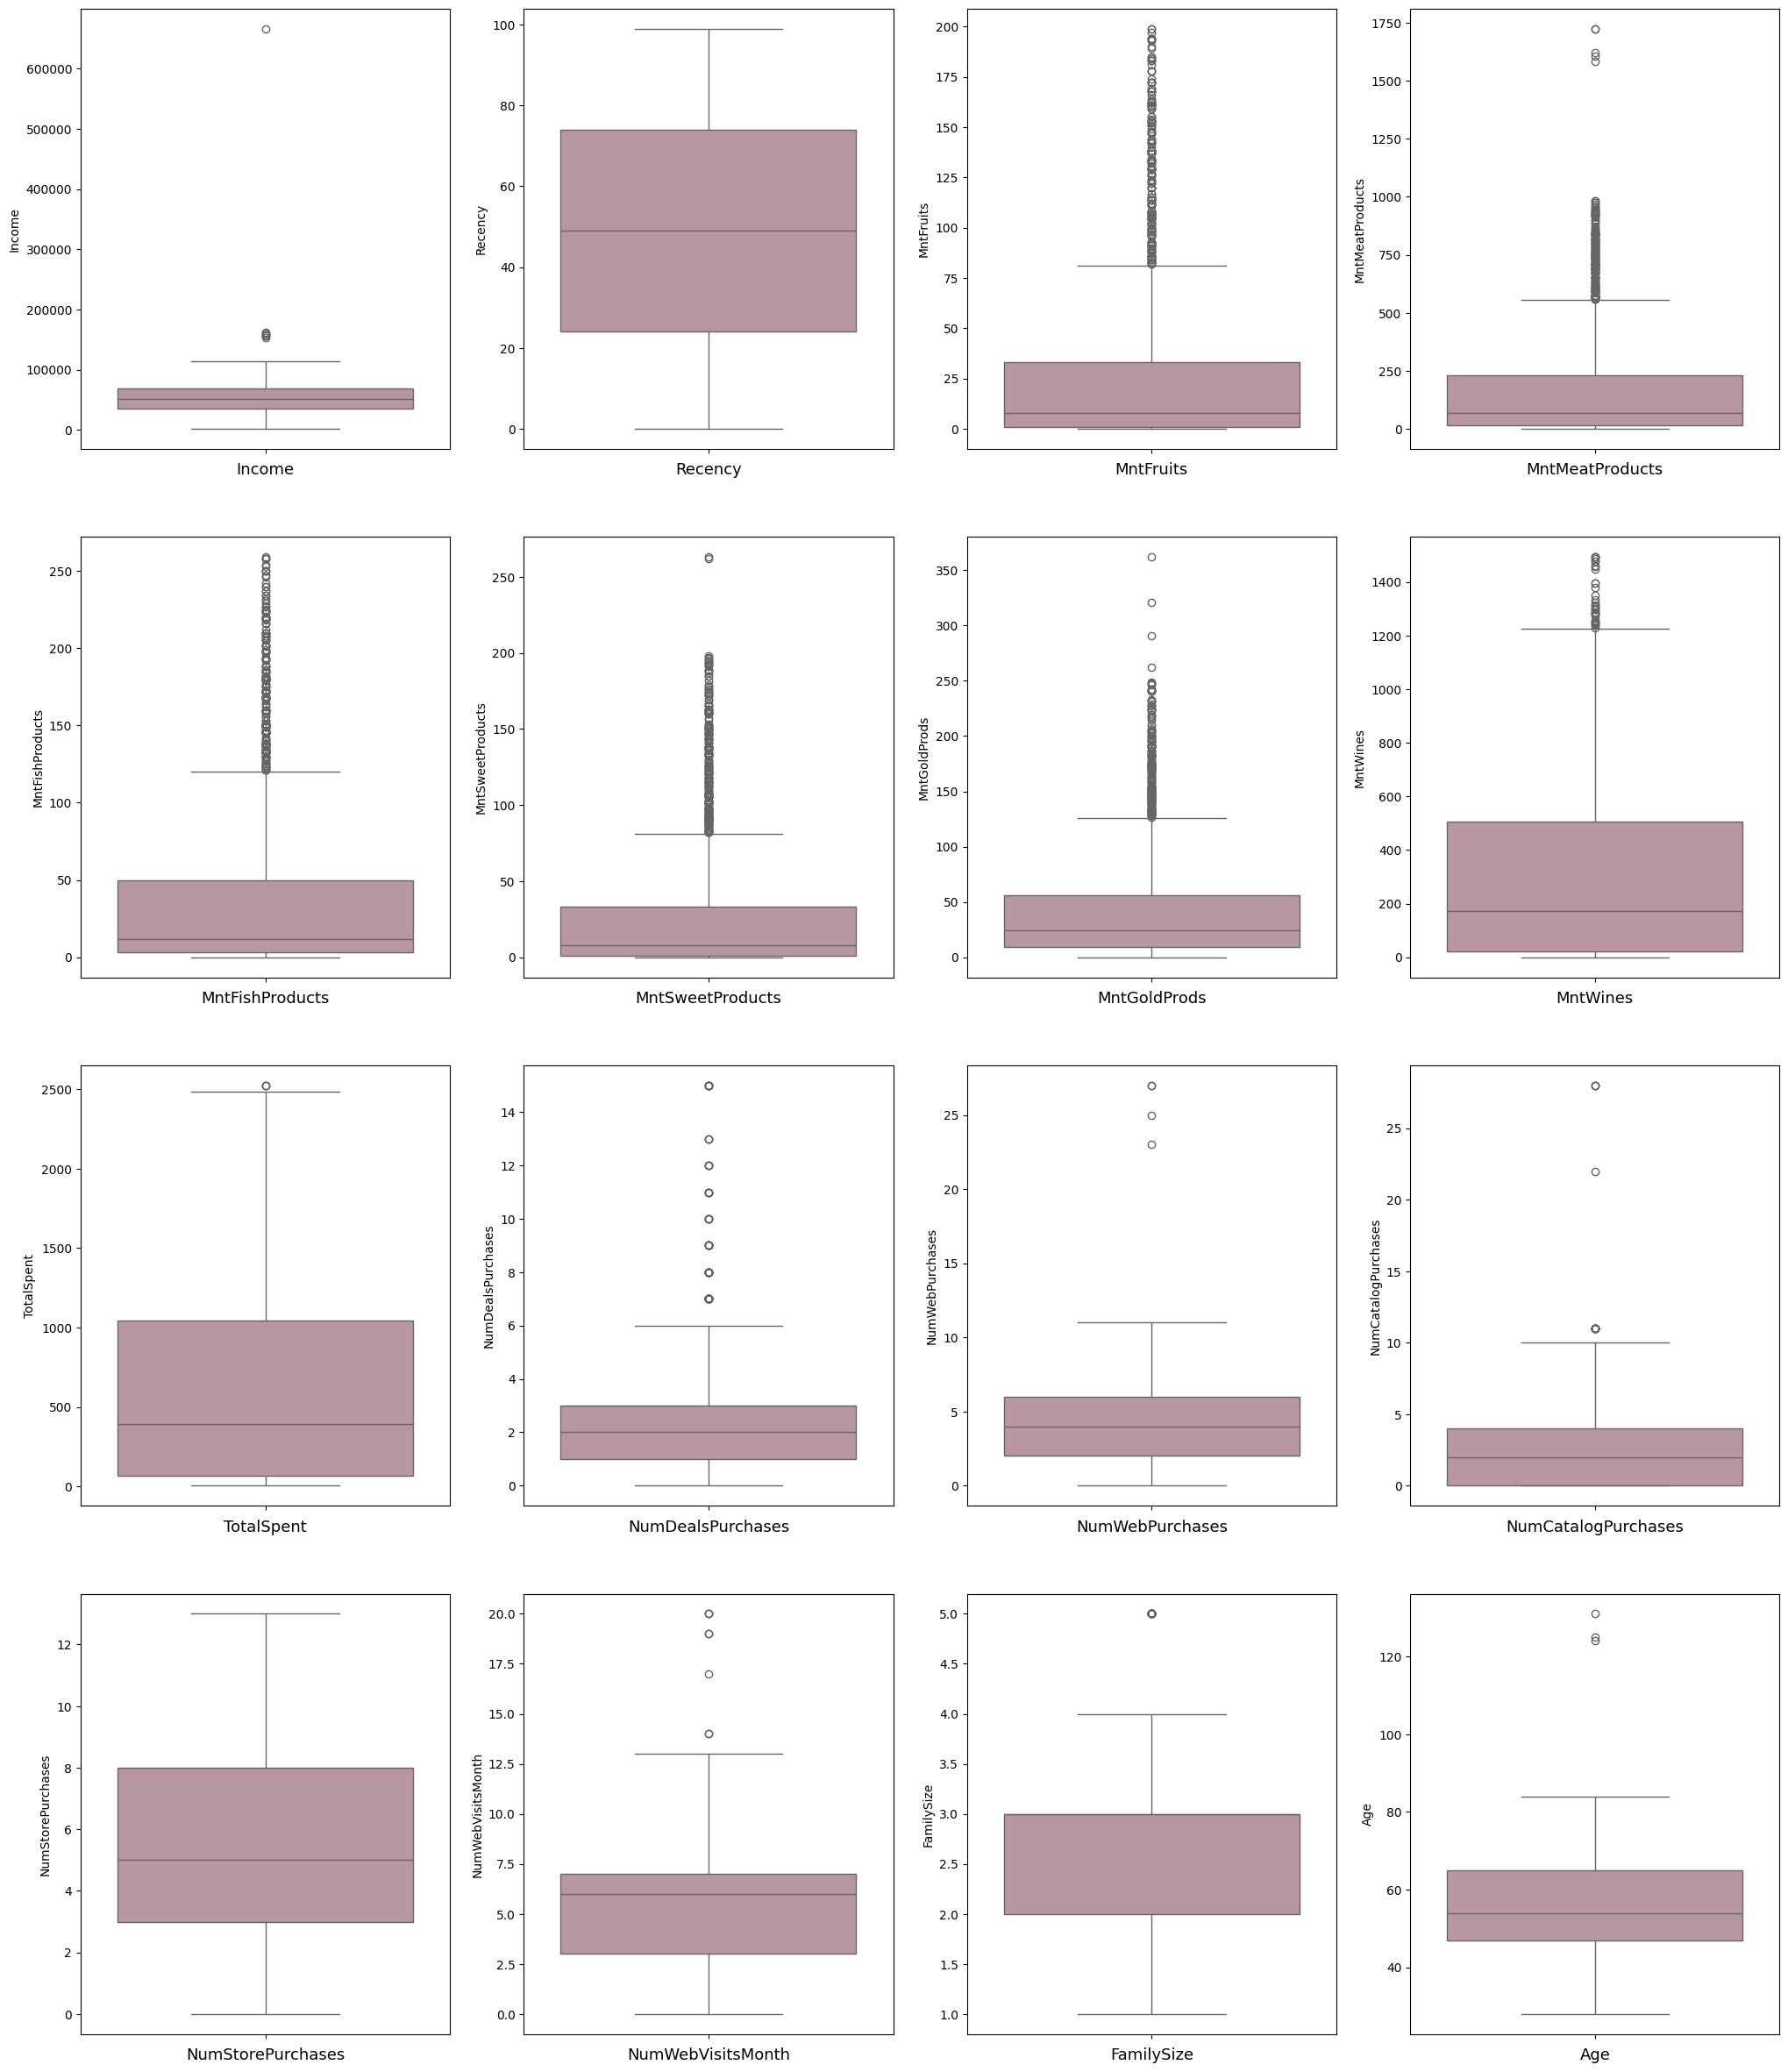

In [21]:
# Plot the outliers in numerical features

numeric_features = ['Income', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'MntWines', 'TotalSpent', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', "FamilySize", "Age"]
            

plt.figure(figsize=(25,30))
for i, column in enumerate(numeric_features):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[column], color = "#be919f")
    plt.xlabel(column, size = 13)
    
plt.show()



From the boxplot, except for "NumStorePurchases", all others numeric features contain outliers. To clean the data, we use interquartile range to exclude these data points

In [24]:
#Remove outliers
def remove_outliers (data):
    features_outliers = ['Age', 'Income', 'FamilySize', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                         'MntSweetProducts', 'MntGoldProds','MntWines', 'TotalSpent', 'NumDealsPurchases', 'NumWebPurchases', 
                         'NumCatalogPurchases', 'NumWebVisitsMonth','FamilySize']
    cleaned = data.copy()
    for i in features_outliers:
        q1 = df[i].quantile(.25)
        q3 = df[i].quantile(.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr 
        upper = q3 + 1.5*iqr 
        cleaned = cleaned[(df[i] >= lower) & (cleaned[i] <= upper) ]
    return cleaned 

#Apply the function to remove outliers
cleaned_data = remove_outliers(df);

# Data after removing outliers
cleaned_data.shape


/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_42609/631518101.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned = cleaned[(df[i] >= lower) & (cleaned[i] <= upper) ]
/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_42609/631518101.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned = cleaned[(df[i] >= lower) & (cleaned[i] <= upper) ]
/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_42609/631518101.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned = cleaned[(df[i] >= lower) & (cleaned[i] <= upper) ]
/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_42609/631518101.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned = cleaned[(df[i] >= lower) & (cleaned[i] <= upper) ]
/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_42609/631518101.py:13: UserWarning: Boolean Series key wi

(1512, 34)

We can see that after extracting information and store in new columns, there are many irrelevant columns that provide little information. Compared to 29 columns, we have 7 more columns after extracting the information. Therefore, we remove the irrelevant columns, or the columns that provide litle information (after finish extracting the meaningful information to other columns)

In [25]:
# Drop some columns to load faster 
columns_drop = ["Z_CostContact", "Z_Revenue", "ID", "Year_Birth", "Adult"]
cleaned_data = cleaned_data.drop(columns_drop, axis=1)
cleaned_data.shape


(1512, 29)

In [304]:
# Inspect the information of this dataset after cleaning and removing outliers
cleaned_data.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days,Age,FnbSpent,TotalSpent,FamilySize,Is_Parent
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,...,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,0.564153,0.352513,43619.422138,0.557540,0.547619,49.148810,191.177249,10.524471,71.101190,15.354497,...,0.023810,0.008598,0.009259,0.104497,3941.966931,54.558862,298.737434,322.910714,2.752646,0.843254
std,0.561138,0.477911,17213.541427,0.530346,0.537521,29.060055,267.746354,15.822165,101.420427,23.431610,...,0.152506,0.092356,0.095810,0.306006,199.585461,11.368235,373.148154,385.701251,0.799358,0.363681
min,0.000000,0.000000,5305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3605.000000,28.000000,8.000000,9.000000,1.000000,0.000000
25%,0.000000,0.000000,30556.250000,0.000000,0.000000,24.000000,13.000000,1.000000,11.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,3763.000000,46.000000,40.000000,49.000000,2.000000,1.000000
50%,1.000000,0.000000,42390.000000,1.000000,1.000000,49.000000,56.000000,4.000000,26.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,3934.500000,53.000000,118.000000,132.500000,3.000000,1.000000
75%,1.000000,1.000000,55691.250000,1.000000,1.000000,75.000000,261.250000,12.000000,86.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,4107.250000,64.000000,432.250000,461.500000,3.000000,1.000000
max,2.000000,1.000000,90933.000000,2.000000,2.000000,99.000000,1218.000000,81.000000,545.000000,120.000000,...,1.000000,1.000000,1.000000,1.000000,4304.000000,84.000000,1809.000000,1835.000000,4.000000,1.000000


# Visuzalize data information

TO understand this dataset, we draw some plots to see the data meaning

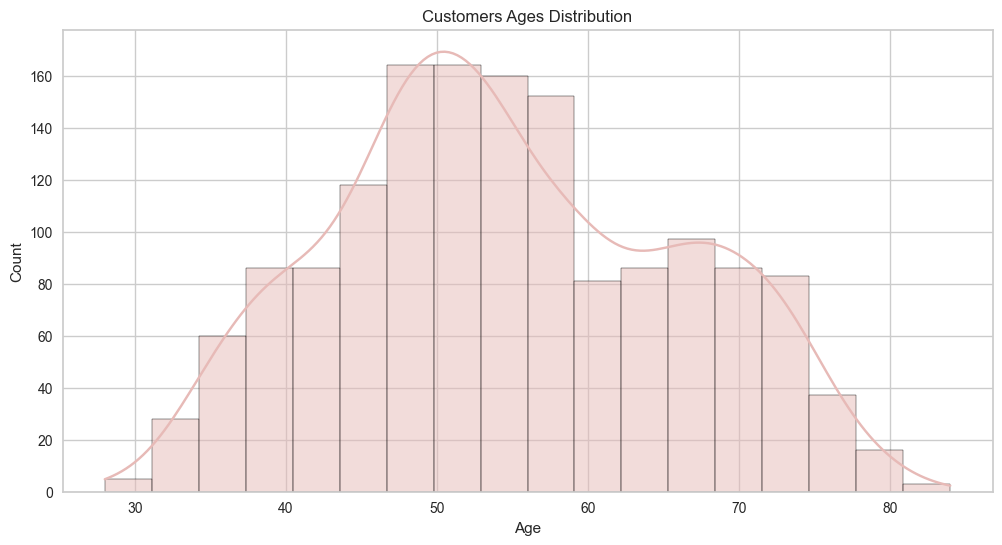

In [305]:
# Customer's age distribution
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data['Age'], color="#e7bab7",kde=True )
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Customers Ages Distribution')
plt.show()



The age of the customers in this store is from 30 to 80, and this is normally distributed with most people in the age of 50

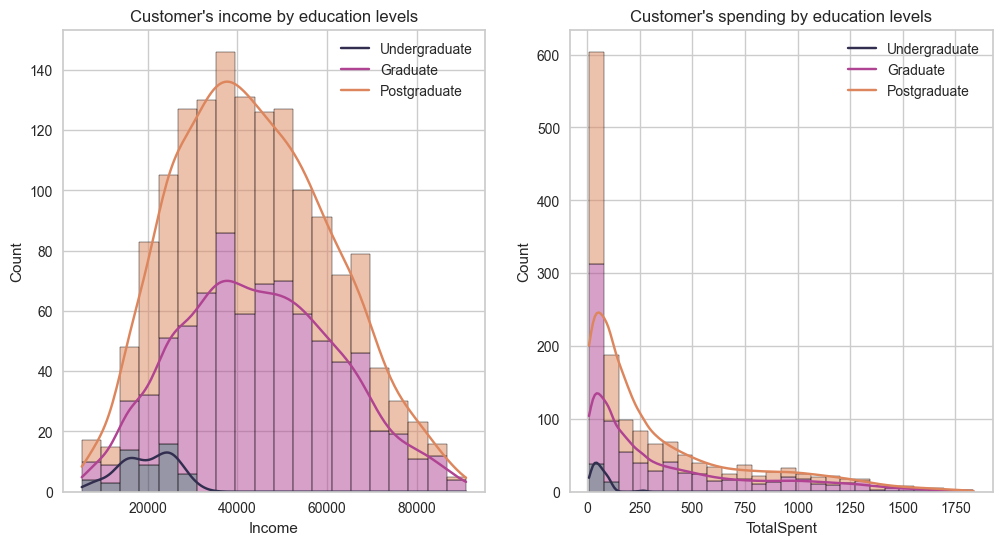

In [306]:
# Plot the income to see if there is any relation between education levels and income
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=cleaned_data, x="Income", hue="Education", multiple="stack", palette=["#dd865d", "#b04392", "#312e4f"], kde=True)
plt.title("Customer's income by education levels")
plt.legend(["Undergraduate","Graduate","Postgraduate"])

# Plot the customer's spending if there is any relation between education levels and spending
plt.subplot(1, 2, 2)
sns.histplot(data=cleaned_data, x="TotalSpent", hue="Education", multiple="stack", palette=["#dd865d", "#b04392", "#312e4f"], kde=True)
plt.title("Customer's spending by education levels")
plt.legend(["Undergraduate","Graduate","Postgraduate"])

Graduate tend to be the group of customers that earn more than other groups. The lowest income group is the Undergraduate group, and they also tend to spend the least on this store. The customer number in this store mainly belong to Postgraduate group. 

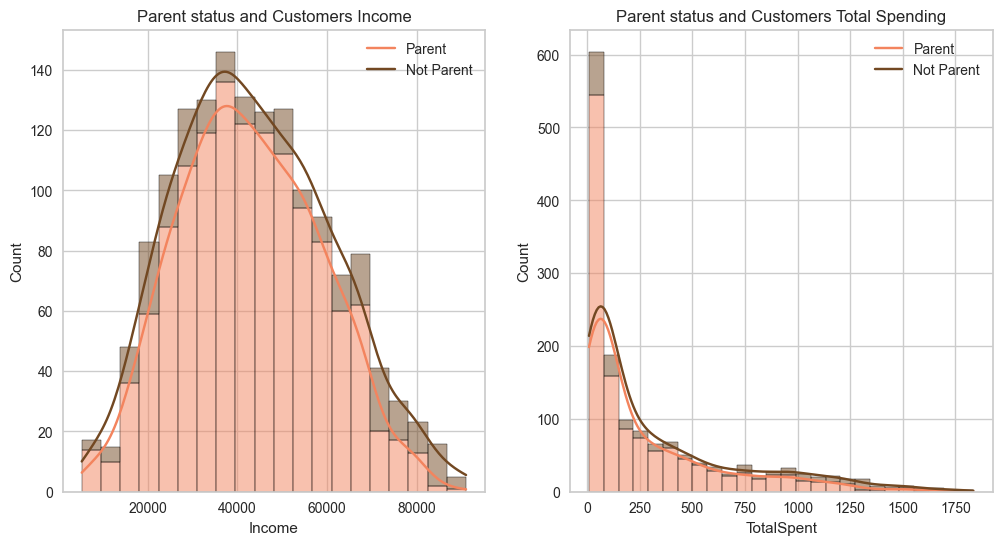

In [307]:
# Plot the parent status with income
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=cleaned_data, x="Income", hue="Is_Parent", multiple="stack", palette=["#724822", "#f3845e"], kde=True)
plt.title("Parent status and Customers Income")
plt.legend(["Parent", "Not Parent"])

# Plot the parent status with total spending
plt.subplot(1, 2, 2)
sns.histplot(data=cleaned_data, x="TotalSpent", hue="Is_Parent", multiple="stack", palette=["#724822", "#f3845e"], kde=True)
plt.title("Parent status and Customers Total Spending")
plt.legend(["Parent", "Not Parent"])


Customers who are parents tend to earn more and spend more, and the majority part of this store's customers are parents

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_12018/489014492.py:16: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(manip,x="FamilySize", y="Spending", hue="Product", palette=colors)
/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_12018/489014492.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x="FamilySize", palette=colors)
/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_12018/489014492.py:21: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(data=cleaned_data, x="FamilySize", palette=colors)


Text(0.5, 1.0, 'Count the customers by their family sizes')

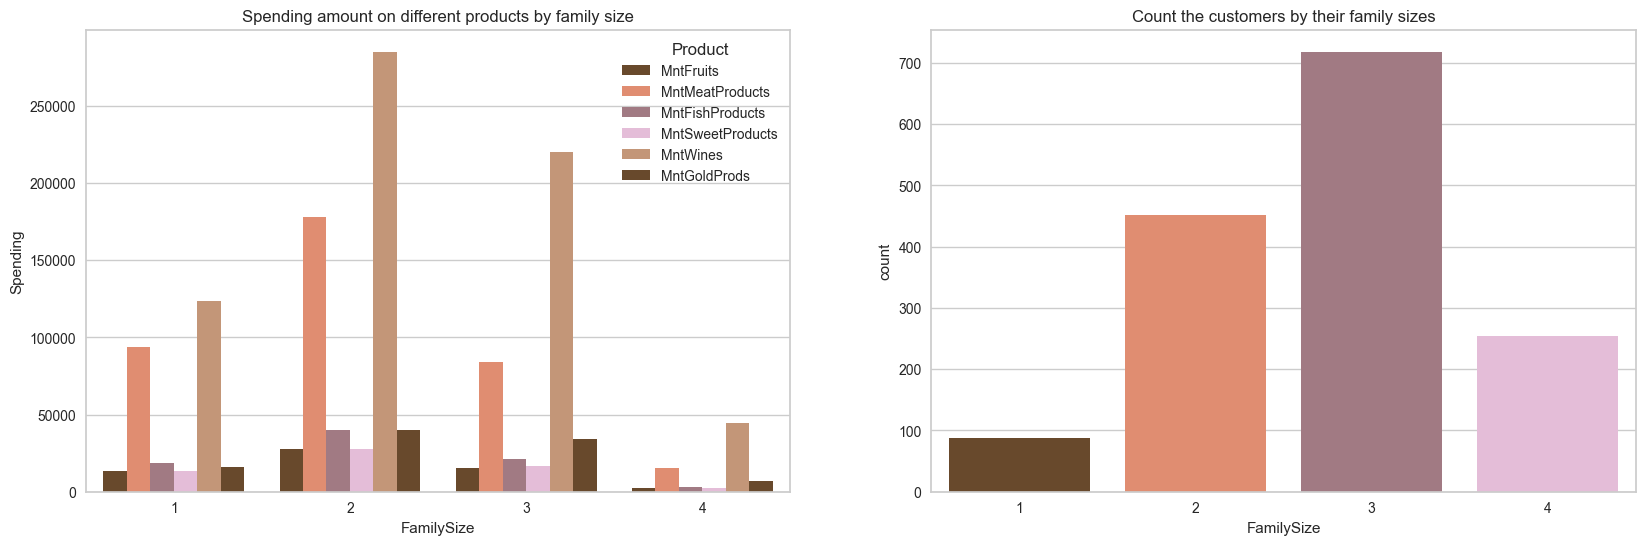

In [308]:
# Create a data frame to get the spending amount on each product by family size
manip = cleaned_data.copy()
manip.groupby('FamilySize')
categories = ["MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntWines", "MntGoldProds"]
manip = df.groupby('FamilySize')[categories].sum().reset_index()
manip = pd.melt(manip, id_vars='FamilySize', value_vars=categories, var_name="Product", value_name="Spending")
#Since 5 is not present in the output (check with unique values) but the converted manip dataframe has displayed, so:
manip = manip[manip['FamilySize'] != 5]

#Plot the spending on different product type by family size
colors = ["#724822", "#f3845e","#a87380", "#ebb6da", "#cf936c"]
fig = plt.figure(figsize=(20, 6))

#Plot the spending on different products by family size
plt.subplot(1, 2, 1)
sns.barplot(manip,x="FamilySize", y="Spending", hue="Product", palette=colors)
plt.title("Spending amount on different products by family size")

#Plot the number of customer by their family size
plt.subplot(1, 2, 2)
sns.countplot(data=cleaned_data, x="FamilySize", palette=colors)
plt.title("Count the customers by their family sizes")


The amount customers spent on wines account for the greatest part in purchased products of this store. The second highest is meat product. Besides, family with greater size tend to consume Wine and Gold less than the smaller family size.

<Axes: >

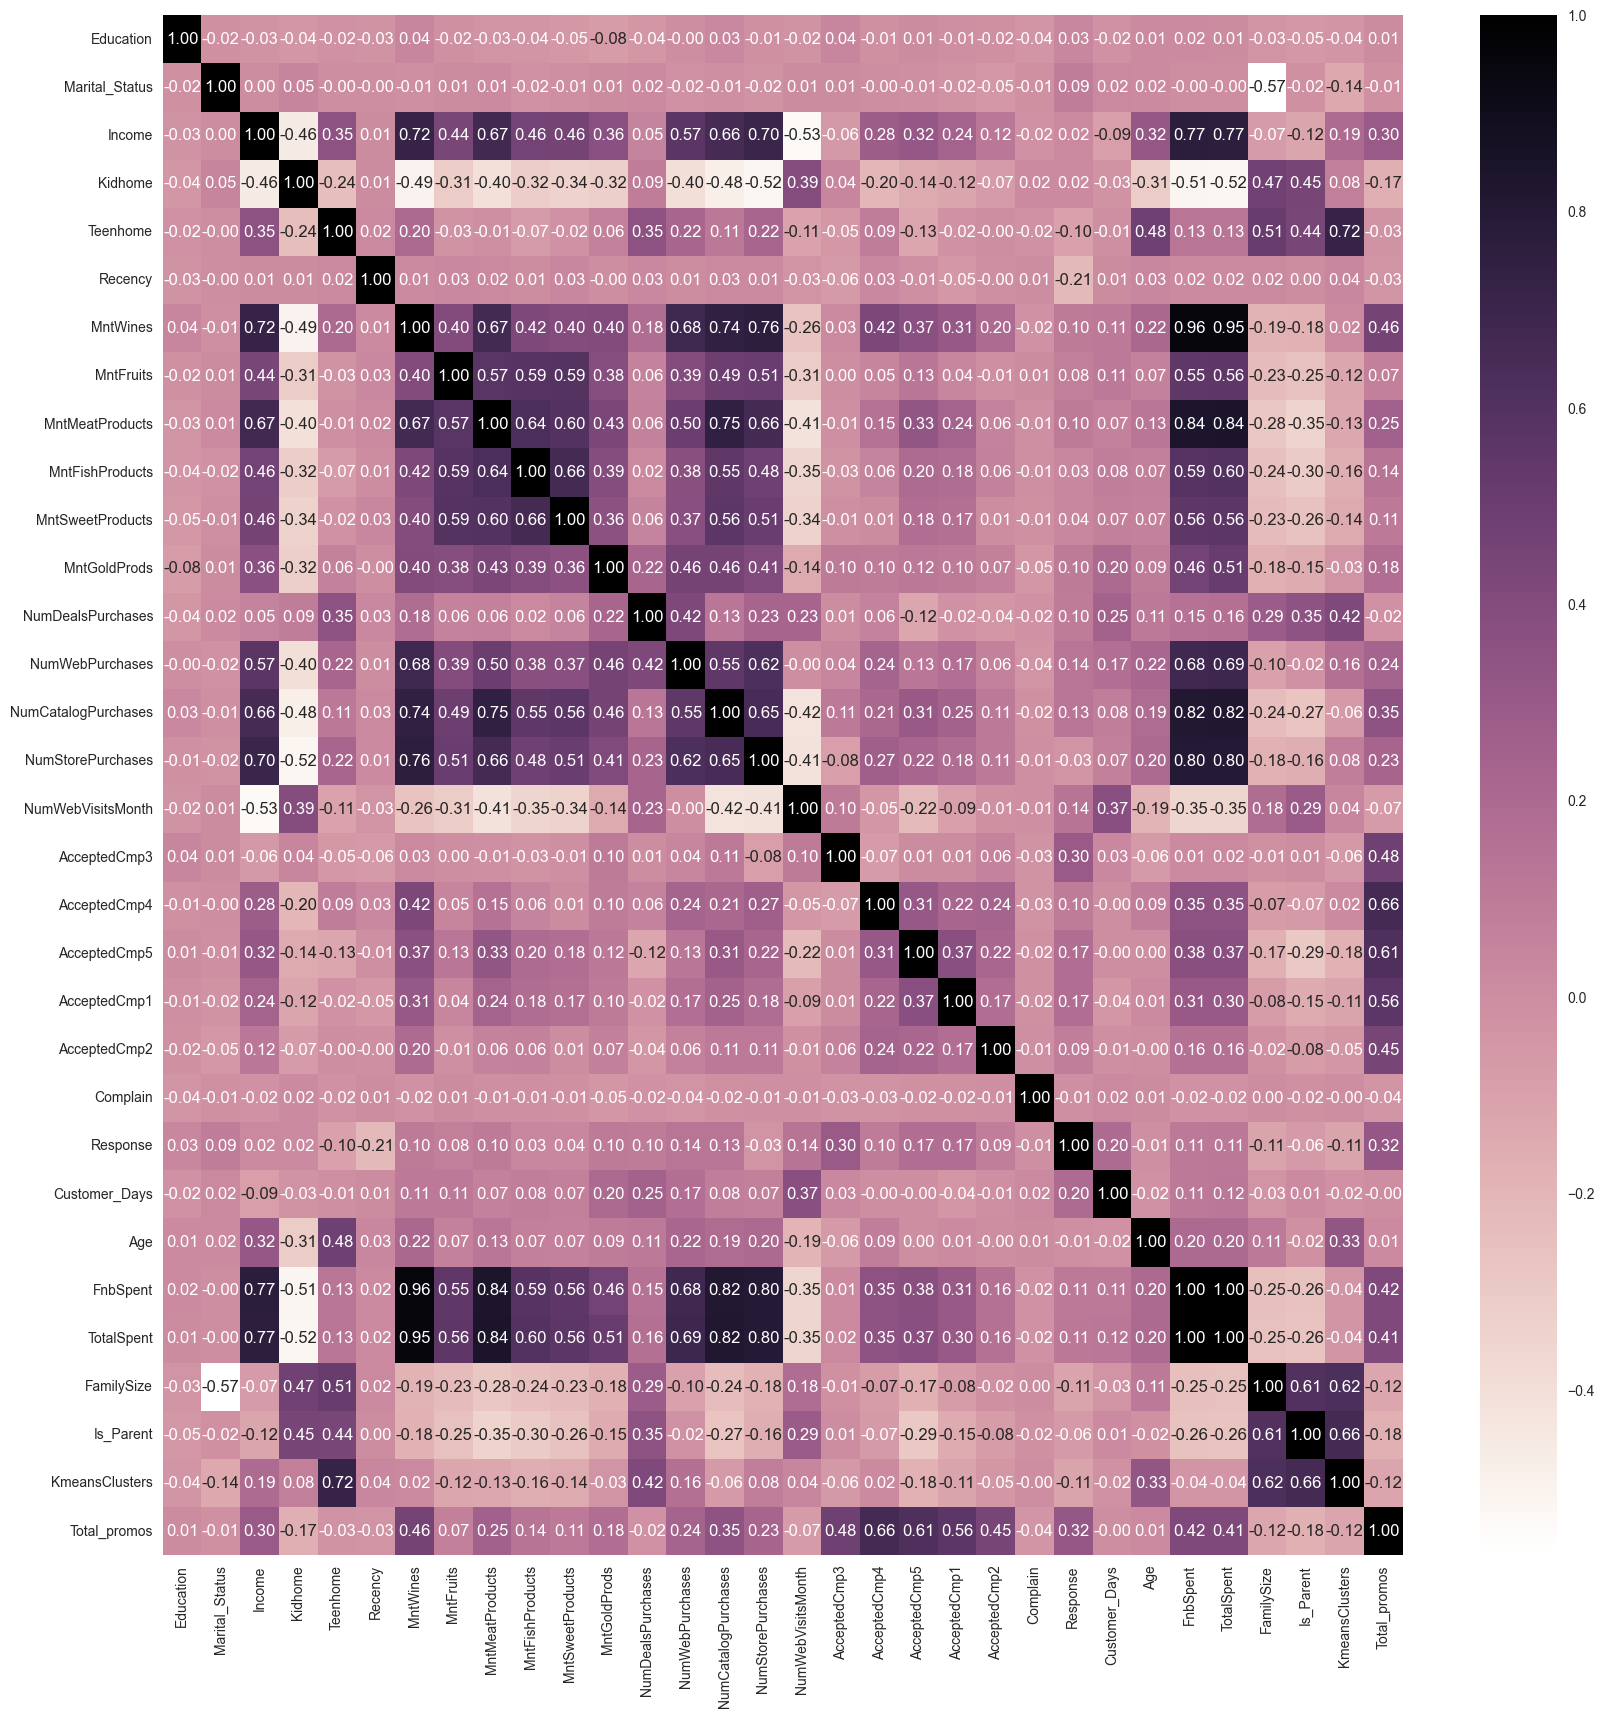

In [351]:
# Draw correlation heatmap to know the features we should pay attention to after clustering
corr = cleaned_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap = sns.cubehelix_palette(dark=0, light=1, as_cmap=True))

Some features have high correlation illustrated in this matrix are: 
- Income with TotalSpent
- TotalSpent with CatalogPurchases
- Customers_Days and NumWebVisitsMonth
- NumberStorePurchases with MntMeatProducts and MntWineProducts

These features could be considered when drawing the customer's portrait to learn their behaviour and purchasing pattern

## Standardize data

Since the data of categorical data contains less than 4 values in each columns, we don't need to scale the categorical data.

In [311]:
# Define numeric columns
numerical_features = ["Income", "Recency","NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", 
                      "NumWebVisitsMonth", "TotalSpent","Age","FamilySize" ] 
# Scale the data
scaler = StandardScaler()
cleaned_data_arr = scaler.fit_transform(cleaned_data)

# Dimentionality Reduction


This dataset contains many features. Clustering method cannot deal with high-dimensional dataset, and this causes the curse of dimentionality. To reduce the impact, we reduce the number of dimensions to find out meaningful clusters. To do this, we apply the dimentionality reduction technique called Principal Component Analysis (PCA). Since we intend to perform clustering to discover the customer segmentation, we 'll apply PCA on the whole dataset. First, we try with 10 features to know if it covers the most information of this dataset. Then, we evaluate with Percentage Explained Variance.

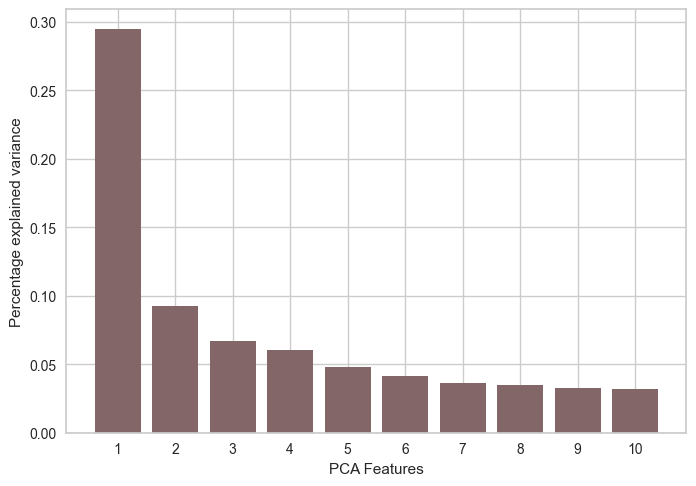

In [312]:
#Initiating PCA to reduce features to 10
pca = decomposition.PCA (n_components=10)
pca_data = pca.fit_transform(cleaned_data_arr)
pca_df = pd.DataFrame(pca_data)

#Plot the Variance Percentage and the number of features
selected = range(1, pca.n_components_+1)
plt.bar(selected, pca.explained_variance_ratio_, color = "#836667")
plt.ylabel('Percentage explained variance')
plt.xlabel('PCA Features')
plt.xticks(selected);

$$ \text {Percent Explained Variance} = \frac{\text{Variance of Principal Component}}{\text{Total Variance of the Data}} \times 100\% $$

From this plot, the first four principal components make up around 70% of the total variance in the dataset. Starting from the fifth feature, they explain relative small portion of the remaining variance. Therefore, we would select 4 features after performing

In [313]:
# Finalize PCA after selecting features with threshold of 70% 
pca = decomposition.PCA (n_components=4)
copy_cleaned = cleaned_data_arr.copy()
pca_data = pca.fit_transform(copy_cleaned)
pca_df = pd.DataFrame(pca_data)
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1512.0,-4.699357e-18,2.973583,-3.669123,-2.255967,-1.293914,1.764300,10.356812
1,1512.0,-1.127846e-16,1.663798,-3.952810,-1.267062,-0.137736,0.981669,4.496990
2,1512.0,-1.597781e-16,1.414562,-3.335723,-0.959834,-0.144299,0.841966,5.157087
3,1512.0,1.198336e-16,1.343063,-3.766981,-0.567711,-0.015899,0.402239,10.466253


When segmenting the customers, we try to identify the characteristics of a customers group, so that partitional clustering would help us to define the customer segmentation without overlapping information. That's why we'll apply Kmeans in this case.

# Clustering with Kmeans

### Select optimal K with Elbow method

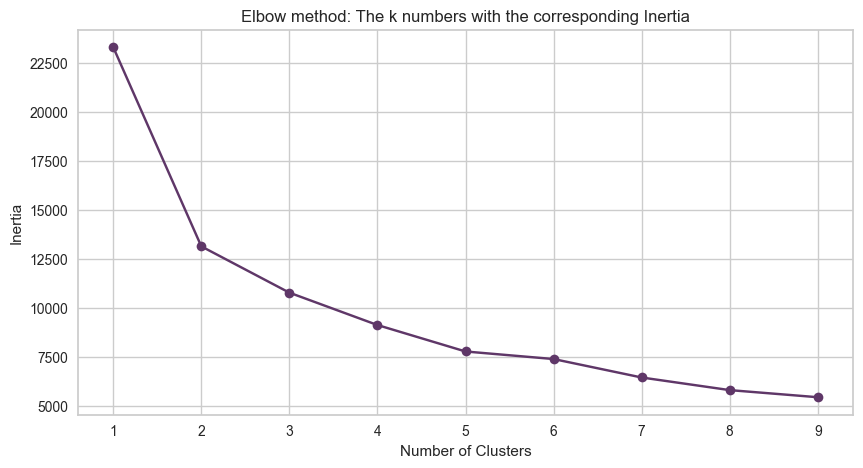

In [314]:
# Plot the elbow of k values and total within sum of square (WCSS)
def optimise_k_means(data,max_k):
    means = []
    inertias = []

    for k in range (1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    plt.subplots(figsize = (10,5))
    plt.plot(means, inertias,'o-', color = "#5f3768")
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title("Elbow method: The k numbers with the corresponding Inertia")
  
optimise_k_means(pca_df,10)


The inertia reflects the total within sum of square (WCSS) .The total within sum of square (WCSS) calculates the sum of distances between each data point in a cluster to its centroid. With different k, we have differnt WCSS. The aim is to find  K where WCSS starts to be more stable and changes little. From this graph, we can select k at 5 to segnment the customers. This k considers the trade-off between the cluster number and the WCSS.
### Clustering with Kmeans with 5 number of clusters

In [326]:

kmeans = KMeans(n_clusters=5, random_state = 142)
kmeans.fit(pca_df)
pca_df["The_Clusters"] = kmeans.labels_
cleaned_data["KmeansClusters"] = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0.5, 1.0, 'Visualization of Clusters')

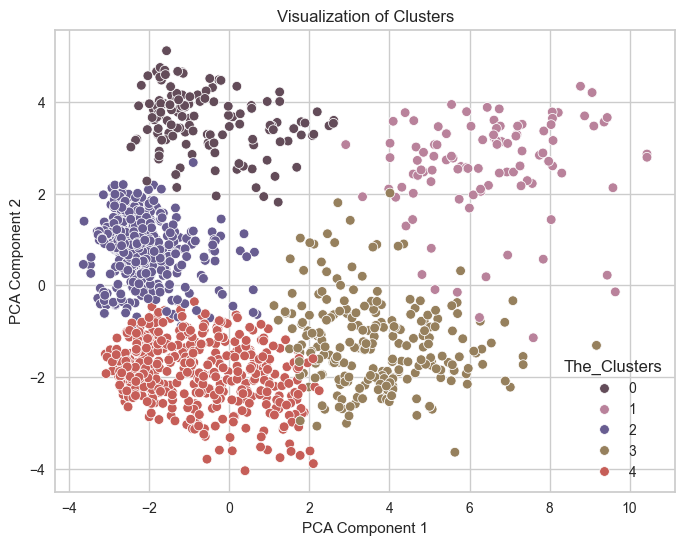

In [327]:
#Apply pca again to reduce to 2d models
color_palette = ["#634c59","#b9829b","#685d91","#96805d", "#c65e58"]
pca_df.columns = pca_df.columns.astype(str)
pca2 = decomposition.PCA(n_components=2)
pca_new = pca2.fit_transform(pca_df)
pca_to_draw = pd.DataFrame(data=pca_new, columns=["PCA1", "PCA2"])
pca_to_draw["The_Clusters"] = pca_df["The_Clusters"]

#Plot the clusters with two dimensions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_to_draw, x='PCA1', y='PCA2', hue='The_Clusters', palette=color_palette)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualization of Clusters')

## Insights from clusters
### Overal understanding about clusters

/var/folders/r8/5x111tps1gd9t6d1d3qv3ndw0000gn/T/ipykernel_12018/1365368891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x=pca_df["The_Clusters"], palette=color_palette,legend=True )
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


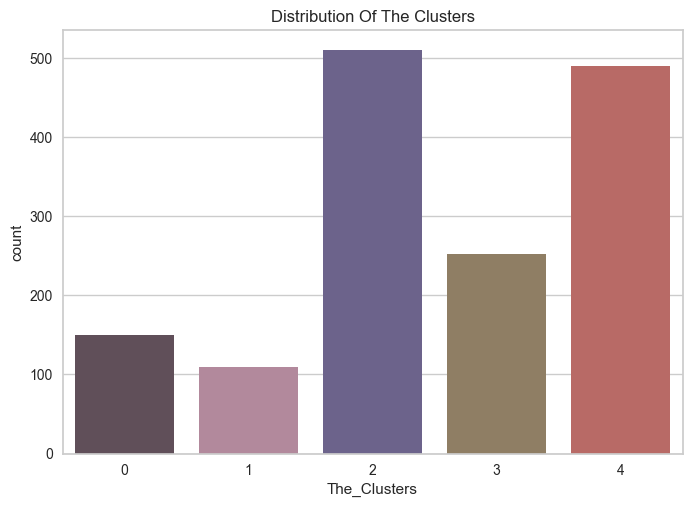

In [328]:
#Plot the number of customers in each clusters
fig = sns.countplot(x=pca_df["The_Clusters"], palette=color_palette,legend=True )
fig.set_title("Distribution Of The Clusters")
plt.legend()

Top three largest quantity of data points in this dataset are cluster 2, cluster 4, and cluster 3 respectively

Overal, to understand which customer groups we are investigating, we use income and their total spending in the store to have general ideas about the group

Text(0.5, 1.0, 'Income and spending by clusters')

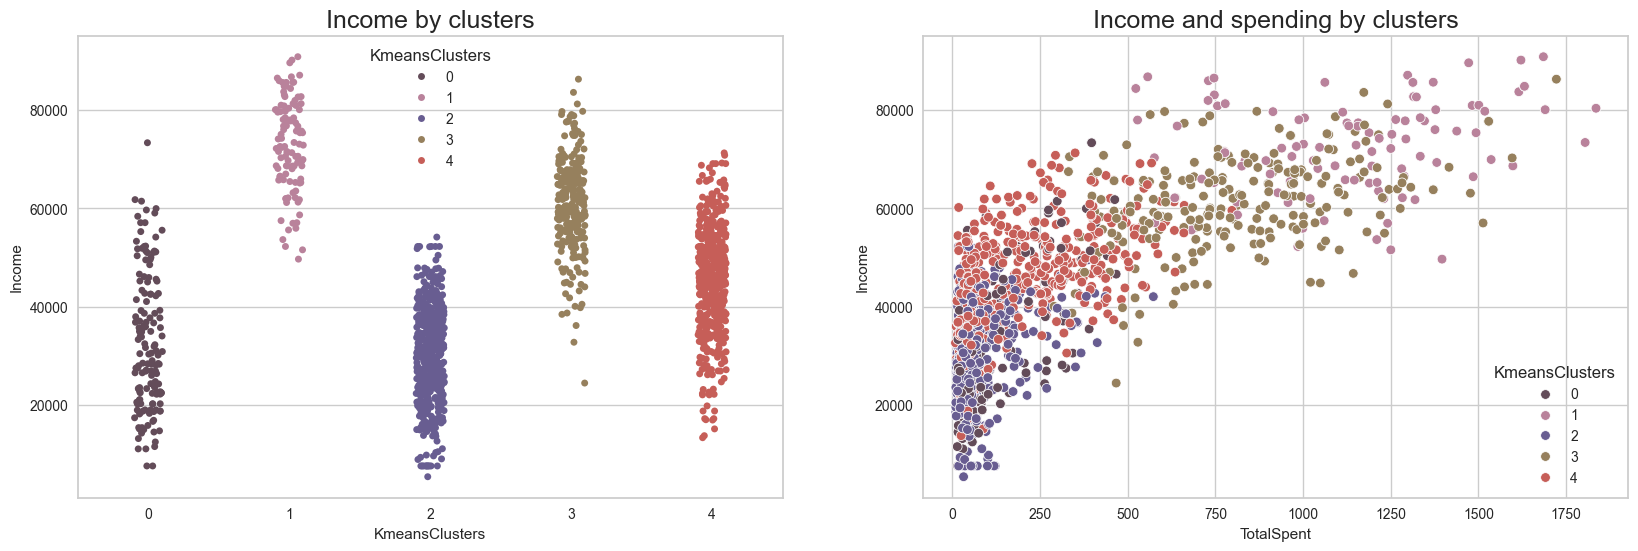

In [355]:
# Plot the income by clusters
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.stripplot(cleaned_data, x="KmeansClusters" ,y="Income",hue="KmeansClusters", palette=color_palette)
plt.title("Income by clusters", size=18)

#Plot the income and total spending by clusters
plt.subplot(1, 2, 2)
sns.scatterplot(cleaned_data, x="TotalSpent" ,y="Income",hue="KmeansClusters", palette=color_palette)
plt.title("Income and spending by clusters", size=18)




From income and total spending, we can find out the portrait of the customers in this store is that: 
- Cluster 0: Low to average income and average spending (Income from under 20000 to about 60000 per year)

- Cluster 1: High income, high spending (Income under 60000 to above 80000 per year)

- Cluster 2: Low income, low spending (Income from under 10000 to 50000 per year)

- Cluster 3: Upper average to high income, high spending (Income under 40000 to 80000 per year)

- Cluster 4: Upper average income, average spending (Income from 20000 to above 60000 per year)





### Purchasing behaviour of each cluster

We'll see the behaviour of purchasing through the customer's responses to marketing campaigns, purchases with deals, purchasing platforms,

Text(0.5, 1.0, 'Purchasing times with deals by clusters')

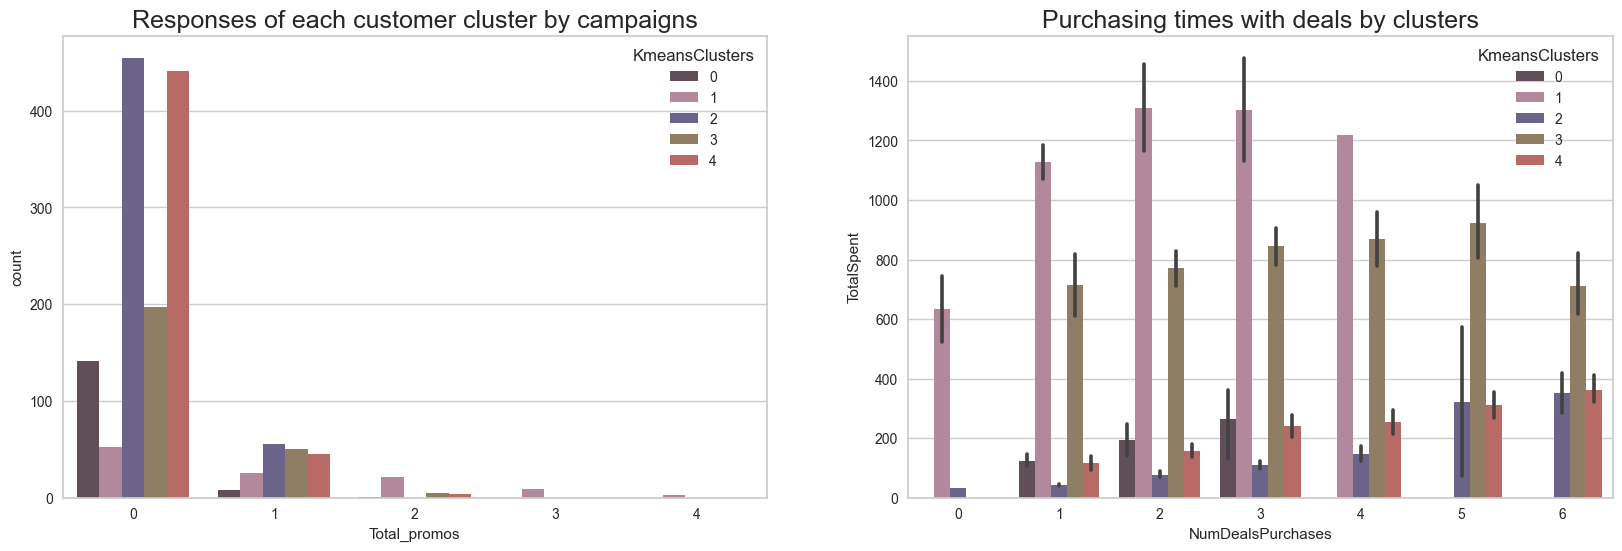

In [338]:
# Find the sum of all responses throught out 5 marketing campaigns
cleaned_data["Total_promos"]=cleaned_data["AcceptedCmp1"] + cleaned_data["AcceptedCmp2"] + cleaned_data["AcceptedCmp3"] + cleaned_data["AcceptedCmp4"] +cleaned_data["AcceptedCmp5"]

#Plot the responses of each customer group by campaigns
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(cleaned_data, x="Total_promos", hue = "KmeansClusters", palette=color_palette)
plt.title("Responses of each customer cluster by campaigns", size=18)

# Plot the purchasing times with deals by clusters
plt.subplot(1, 2, 2)
sns.barplot(cleaned_data, x="NumDealsPurchases",y="TotalSpent" ,hue="KmeansClusters", palette=color_palette)
plt.title("Purchasing times with deals by clusters", size=18)

The majority of customers didn't response to the marketing campaign. No cluster response all five campaigns and the later campaigns tend to get fewer responses.  Cluster 2, cluster 3, and cluster 4 have more people reply to a campaign than other clusters. Customer in cluster 1 reply more than once. The cluster 1 doesn't have outstanding responses number, but people in this group have high income and high spending, and they have responded to the marketing campaigns from 1 to 4 times. 

Customers in cluster 3 have the highest number of times purchasing with deals (6 times), and the customer in cluster 1 spend a great amount of money even without deals. The marketing campaigns giving vouchers might work efficiently for customers in group 2,3, and 4.

These insights could be used in the future campaigns to plan the targeted audience differently at each stage of the campaign



Text(0.5, 1.0, 'Number of web visits per month by clusters')

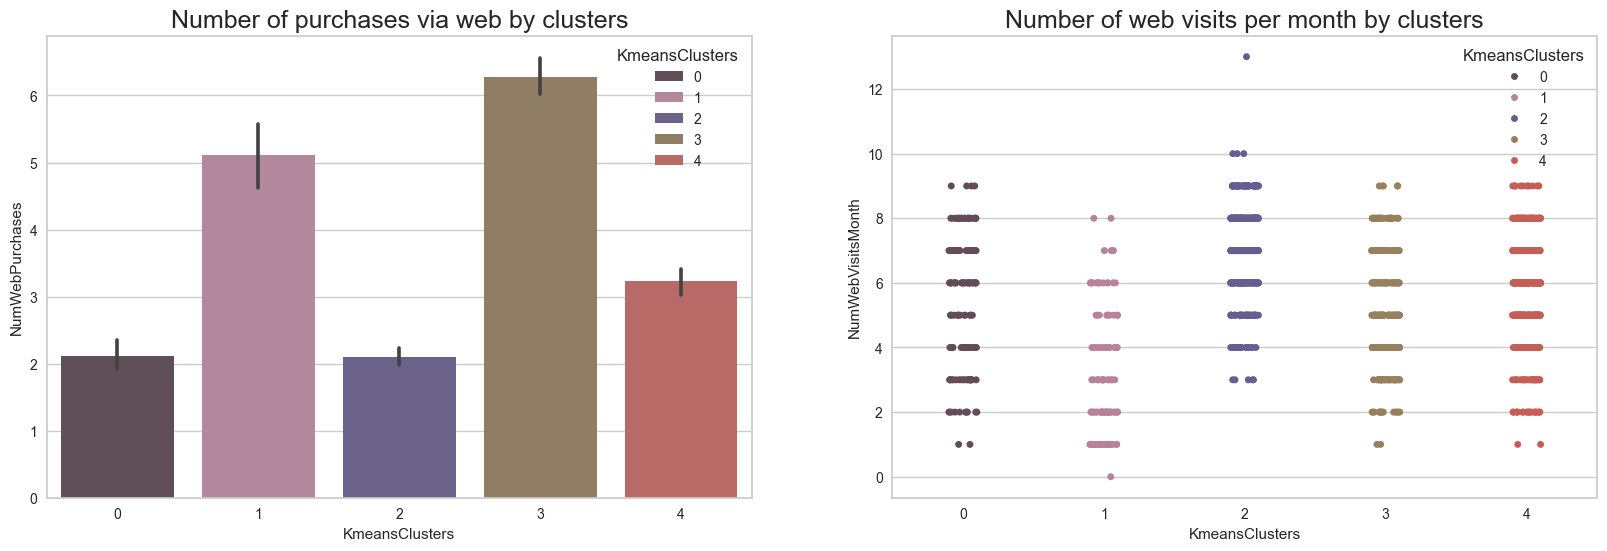

In [380]:
# Plot the purchases via web by clusters
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(cleaned_data, x= "KmeansClusters", y ="NumWebPurchases", hue = "KmeansClusters", palette=color_palette)
plt.title("Number of purchases via web by clusters", size=18)

# Plot the web visits per month by clusters
plt.subplot(1, 2, 2)
sns.stripplot(cleaned_data, x="KmeansClusters", y = "NumWebVisitsMonth",hue="KmeansClusters", palette=color_palette)
plt.title("Number of web visits per month by clusters", size=18)

Cluster 2 has the higest number for the web visits per month, and they made around 1 to 5 purchases via web. The most number of purchases (above 6 purchases) are made by customers in cluster 3 and cluster 4

Text(0.5, 1.0, 'Number of purchases in store by clusters')

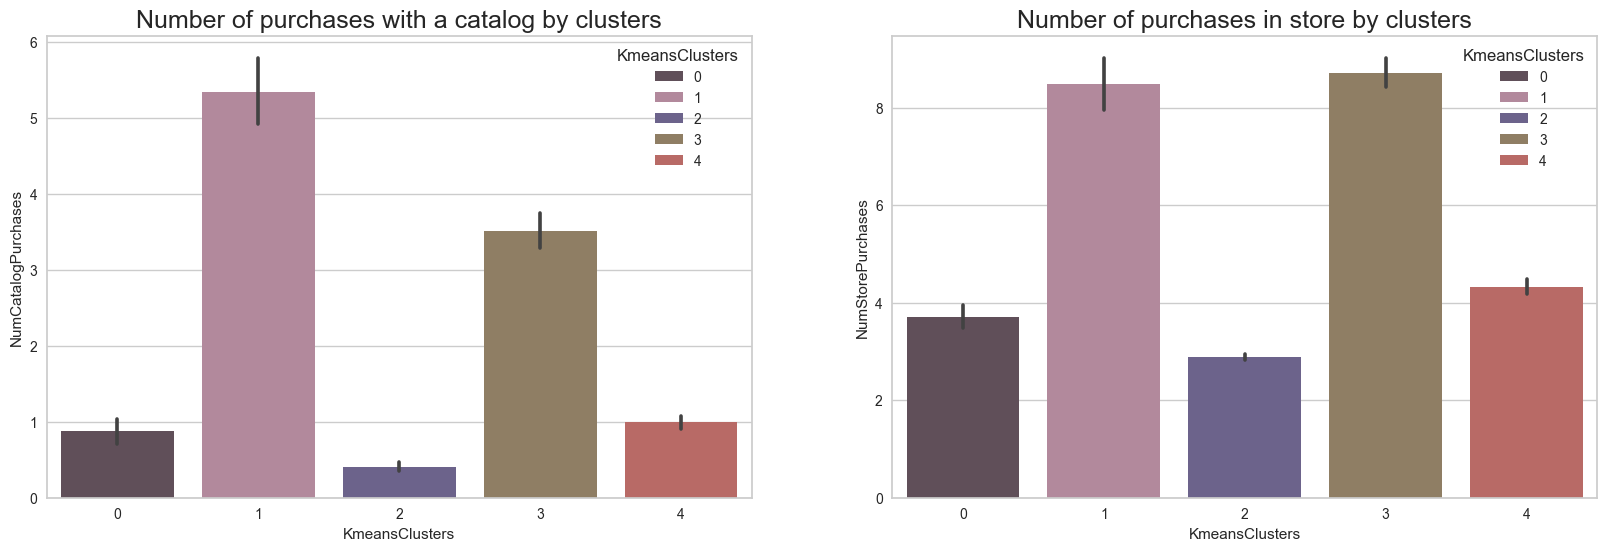

In [381]:
#Plot the purchases with one catalog by clusters
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(cleaned_data, x= "KmeansClusters", y ="NumCatalogPurchases", hue = "KmeansClusters", palette=color_palette)
plt.title("Number of purchases with a catalog by clusters", size=18)

# Plot the purchases in store by clusters
plt.subplot(1, 2, 2)
sns.barplot(cleaned_data,  x= "KmeansClusters", y ="NumStorePurchases", hue = "KmeansClusters", palette=color_palette)
plt.title("Number of purchases in store by clusters", size=18)

We can see that: 
- In-store purchase is the most favourable option that has at least 2 purchases for almost all customers
- Cluster 0: prefer web and store rather than catalog
- Cluster 1:  has the highest number of catalog purchases and store purchases
- Cluster 2: little interest in purchasing via catalog, lowest purchase number through all three platforms
- Cluster 3: prefer website and store purchases 
- CLuster 4: also prefer website and store purchases , but significantly lower number of purchases comapred to cluster 3

After drawing some insights from the customer's behaviours, we could build the customer's profile to help the store understand their customers portrait

### Customes portrait

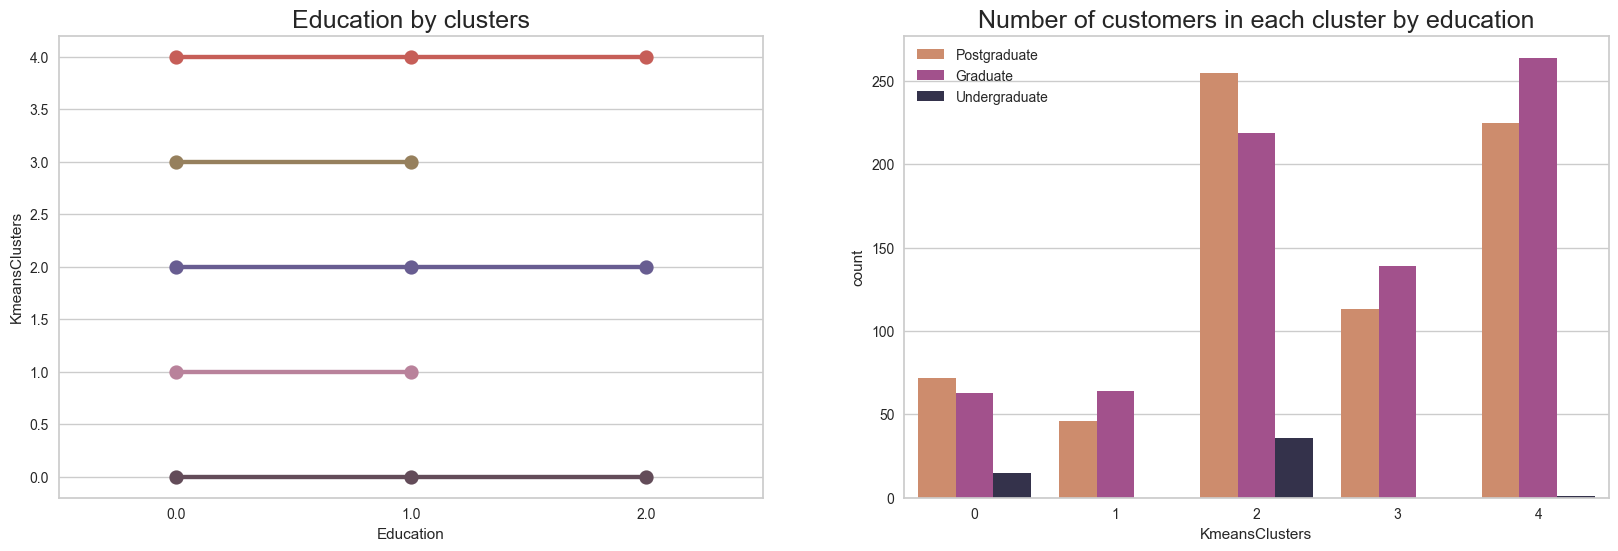

In [353]:
# Plot education by clusters
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.pointplot(cleaned_data, x="Education", y="KmeansClusters", hue="KmeansClusters", palette=color_palette,legend=False)
plt.title("Education by clusters", size=18)

# Plot Customers in each cluster by education
plt.subplot(1, 2, 2)
sns.countplot(cleaned_data,x="KmeansClusters", hue="Education", palette=["#dd865d", "#b04392", "#312e4f"])
plt.title("Number of customers in each cluster by education", size=18)
plt.legend(["Postgraduate","Graduate","Undergraduate"])


Cluster 1 and Cluster 3 only contain customers of Graduate and Postgraduate levels while other clusters contains all three levels. Since the number of customers in Postgraduate level outweight the other groups, so the education factor might not be a good characteristic for this store's marketing campaign design 

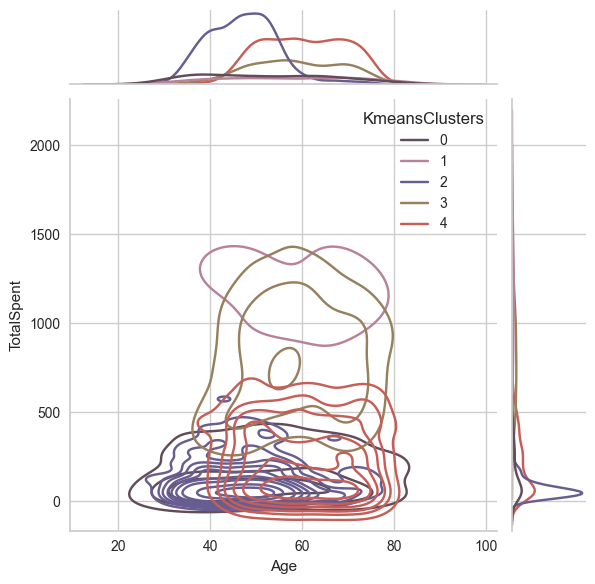

In [344]:
# "Age","Customer_Days", "Teenhome","Kidhome", "FamilySize" are the personal information of the customers
# Plot age with each clusters
sns.jointplot(cleaned_data, x="Age", y="TotalSpent", hue="KmeansClusters",palette=color_palette,kind="kde")


Customers in cluster 0 have age range from above 20 to under 60

Customers in cluster 1 have age range from 40 to under 80

Customer in cluster 2 have age range from around 40 to 80

Customer in cluster 3 have age range from under 40 to just 80

Customer in cluster 4 have age range around 40 to above 80


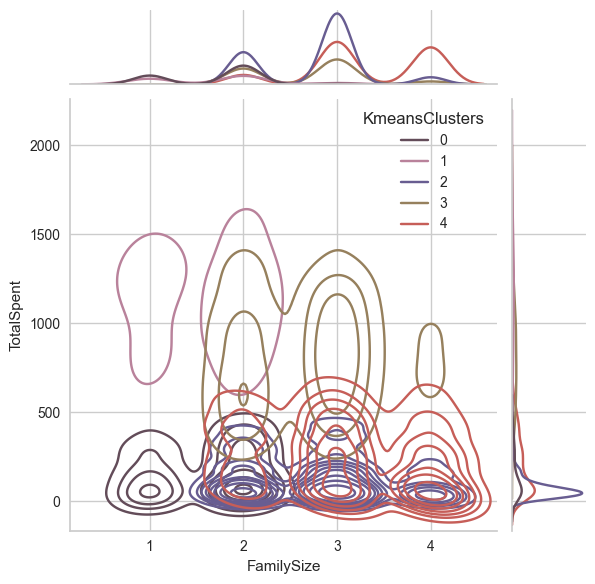

In [354]:
sns.jointplot(cleaned_data, x="FamilySize", y="TotalSpent", hue="KmeansClusters",palette=color_palette,kind="kde")

Cluster 0: 1 or 2 people

Cluster 1: 1 or 2 people

Cluster 2: 2 to 4 (most people in family size of 3 stay in cluster 2, compared to others')

Cluster 3: 2 to 3 people 

Cluster 4: 2 to 4 (most people in family size of 4 stay in cluster 4, compared to others')

## Summary:
1. Cluster 0:

- Low to average income (under $20,000 to above $60,000 per year)
- Average spending
- Prefer web and in-store purchases over catalogs
- Age range: above 20 to under 60 years old
- Family size: 1 or 2 people

2. Cluster 1:

- High income (under $60,000 to above $80,000 per year)
- High spending
- Highest number of catalog and in-store purchases
- Age range: 40 to under 80 years old
- Family size: 1 or 2 people
- Only contains Graduate and Postgraduate education levels
- Have responded to marketing campaigns 1 to 4 times

3. Cluster 2:

- Low income (under $10,000 to $50,000 per year)
- Low spending
- Little interest in purchasing via catalog, lowest purchase numbers across all platforms
- Age range: around 40 to 80 years old
- Family size: 2 to 4 people (most common is 3)

4. Cluster 3:

- Upper average to high income (under $40,000 to $80,000 per year)
- High spending
- Prefer website and in-store purchases
- Age range: under 40 to just 80 years old
- Family size: 2 to 3 people
- Only contains Graduate and Postgraduate education levels
- Highest number of purchases with deals (6 times)

5. Cluster 4:

- Upper average income ($20,000 to above $60,000 per year)
- Average spending
- Prefer website and in-store purchases, but significantly lower purchase numbers compared to Cluster 3
- Age range: around 40 to above 80 years old
- Family size: 2 to 4 people (most common is 4)

Overall, Cluster 1 and Cluster 3 represent the most valuable customers with high income and spending while Cluster 2 represents the least valuable customers with low income and spending. Cluster 0 and Cluster 4 fall somewhere in the middle in terms of income, spending, and purchasing behavior.